## Análisis de datos sesíon de prueba - Proyecto *Magalí Pereyra*.

Autor: MSc. BALDEZZARI LUCAS, Bioingeniero.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import h5py

In [3]:
##cargo 1. agus_base_oa_events.txt en un dataframe
eventos = pd.read_csv('5. agus_imag_events.txt', sep=',', header=0)

In [4]:
eventos

,trialNumber,classNumber,className,startingTime,cueInitTime,trialTime,cueDuration,finishDuration,trialTime(legible)
0,1,2,DERECHA,1.734636e+09,1.734636e+09,1.734636e+09,2.0,1.0,19/12/2024 16:13:34
1,2,2,DERECHA,1.734636e+09,1.734636e+09,1.734636e+09,2.0,1.0,19/12/2024 16:13:52
2,3,1,IZQUIERDA,1.734636e+09,1.734636e+09,1.734636e+09,2.0,1.0,19/12/2024 16:14:10
3,4,2,DERECHA,1.734636e+09,1.734636e+09,1.734636e+09,2.0,1.0,19/12/2024 16:14:28
4,5,1,IZQUIERDA,1.734636e+09,1.734636e+09,1.734636e+09,2.0,1.0,19/12/2024 16:14:46
5,6,1,IZQUIERDA,1.734636e+09,1.734636e+09,1.734636e+09,2.0,1.0,19/12/2024 16:15:04
6,7,2,DERECHA,1.734636e+09,1.734636e+09,1.734636e+09,2.0,1.0,19/12/2024 16:15:22
7,8,1,IZQUIERDA,1.734636e+09,1.734636e+09,1.734636e+09,2.0,1.0,19/12/2024 16:15:40
8,9,2,DERECHA,1.734636e+09,1.734636e+09,1.734636e+09,2.0,1.0,19/12/2024 16:15:58
9,10,1,IZQUIERDA,1.734636e+09,1.734636e+09,1.734636e+09,2.0,1.0,19/12/2024 16:16:16


El dataframe anterior muestra información referente a los eventos registrados por el software generado en Python.

In [5]:
##tomo la columna startingTime y resto cada fila con la anterior para obtener la duracion de cada evento
eventos['startingTime'].diff()

0           NaN
1     17.966480
2     17.953408
3     17.969898
4     17.969877
5     17.949945
6     17.969109
7     17.970497
8     17.959137
9     17.950863
10    17.970294
11    17.949565
12    17.950322
13    17.957152
14    17.952523
15    17.950562
16    17.950408
17    17.955626
18    17.954846
19    17.948998
Name: startingTime, dtype: float64

In [6]:
eventos['startingTime'].diff().mean()
eventos['startingTime'].diff().var()

np.float64(7.186143567596499e-05)

El tiempo promedio de cada trial fue de $17.96$ segundos.

## Cargando archivos hdf5

A continuación vamos a cargar el archivo generado por el *g.HIAMP*. El formato del archivo es *HDF5* el cual es un formato especial para el registro de biopotenciales.

Podemos usar una librería de Python para cargar la información en una variable a partir de ahí, procesar la señal.

In [7]:
fm = 512 #frecuencia de muestreo

In [8]:
##cargo 1. agus_base_oa.hdf5
raw_base_data = h5py.File('5. agus_imag.hdf5', 'r')

In [9]:
raw_base_data.keys()

<KeysViewHDF5 ['AsynchronData', 'RawData', 'SavedFeatues', 'Version']>

In [10]:
raw_base_data["SavedFeatues"]["NumberOfFeatures"]

<HDF5 dataset "NumberOfFeatures": shape (1,), type "<i4">

In [11]:
# print(raw_base_data["AsynchronData"].keys())
print(raw_base_data["AsynchronData"]["Time"][0])

[22264]


In [12]:
raw_base_data["AsynchronData"]["TypeID"][1]

array([2], dtype=int32)

### Analizando marcado de eventos

A continuación vamos a evaluar los eventos externos registrados desde la trigBOX a partir de los sensores ópticos ubicados sobre la pantalla.

In [13]:
for i, type_asyncdata in enumerate(raw_base_data["AsynchronData"]["TypeID"][:5]):
    print("Marcador número:", i)
    print("Valor decimal:", type_asyncdata[0])
    print("Valor binario:", bin(int(type_asyncdata[0])))
    print()

Marcador número: 0
Valor decimal: 3
Valor binario: 0b11

Marcador número: 1
Valor decimal: 2
Valor binario: 0b10

Marcador número: 2
Valor decimal: 2
Valor binario: 0b10

Marcador número: 3
Valor decimal: 2
Valor binario: 0b10

Marcador número: 4
Valor decimal: 2
Valor binario: 0b10



Se muestran los primeros 5 eventos. El primer evento corresponde al sensor óptico que indica el inicio de la sesión. Los siguientes eventos corresponden al sensor óptico que marca el inicio de un nuevo *trial*.

**Al parecer, se configuró los triggers para que trabajen de manera *combinada*.** HAY QUE CHEQUEAR ESTO.

Según el manual, los triggers pueden marcar los eventos de manera sperada o combinada, a saber:

> **INDIVIDUAL TRIGGERS**: By default, trigger channels selected for acquisition are treated individually. Depending on their
configuration, each occurrence of such a trigger channel is represented as a separate event with a
value of HIGH (H) for rising edges or LOW (L) for falling edges.

> **COMBINED TRIGGERS**: The individual trigger channels can also be combined per device. In this mode, all trigger channels of a device are represented by the same event for that device and the value is a binary coded decimal made
up of the current high or low values of the individual trigger channels. For instance, a combined decimal
value of 10 is achieved when trigger channels 2 and 4 are high; this gives a binary code of 0000 1010b
where the least significant bit (right-most) is trigger channel 1 which is low (zero), then trigger channel
2 is high (1), trigger channel 3 is low (zero), trigger channel 4 is high (1) and channels 5 to 8 at the leftmost are low (0). Similarly, a combined decimal value of 3 is achieved when trigger channels 1 and 2 are high, resulting in a binary code of 0000 0011b. The triggers are represented as vertical lines including a description consisting of device's serial number, combined trigger tag, event code and name.

## Tiempos en que se registraron los eventos

A continuación vamos a ver cuando se registraron los eventos según el *g.recorder*.

In [14]:
##imprimimos los segundos a los que sucedieron los eventos marcados
triggers =  raw_base_data["AsynchronData"]["Time"]
for trigger_i in triggers:
    print(trigger_i[0]/fm)

43.484375
59.05859375
77.04296875
94.994140625
112.98046875
130.9140625
148.884765625
166.849609375
184.818359375
202.771484375
220.720703125
238.689453125
256.640625
274.591796875
292.544921875
310.513671875
328.4609375
346.431640625
364.36328125
382.314453125
400.283203125


#### ¿Qué nos dicen estos valores?

- El primer tiempo registrado a los $39.9335$ segundos corresponde, según nuestro setup experimental, al sensor óptico número 2, el cual, en este caso, se corresponde con el inicio de la sesión.
- En base a nuestro setup experimental, los tiempos restantes se corresponden a los eventos de inicio de cada trial.

In [15]:
##duración de cada trial
trials_time = []
for i in range(2, len(raw_base_data["AsynchronData"]["Time"])):
    trials_time.append((raw_base_data["AsynchronData"]["Time"][i] - raw_base_data["AsynchronData"]["Time"][i-1])/fm)

trials_time = np.array(trials_time).reshape(-1)

In [16]:
print(trials_time)
print(np.mean(trials_time))
print(np.std(trials_time))

[17.984375   17.95117188 17.98632812 17.93359375 17.97070312 17.96484375
 17.96875    17.953125   17.94921875 17.96875    17.95117188 17.95117188
 17.953125   17.96875    17.94726562 17.97070312 17.93164062 17.95117188
 17.96875   ]
17.959189967105264
0.014545550637851182


Para este caso, la duración promedio de cada trial es de $17.96$ segundos.

**IMPORTANTE:** Debemos notar que este valor concuerda con los valores registrados en el archivo de eventos generado a partir del script de Python que usamos para estimular a la persona.

## Revisando señales

A continuación analizaremos rápidamente la señal de EEG y EMG registrada en el experimento.

In [17]:
raw_base_data["RawData"].keys()

<KeysViewHDF5 ['AcquisitionTaskDescription', 'DAQDeviceCapabilities', 'DAQDeviceDescription', 'Samples', 'SessionDescription', 'SubjectDescription']>

In [18]:
raw_eeg = raw_base_data["RawData"]["Samples"][:]
raw_eeg.shape

(211827, 67)

De lo anterior podemos ver que la forma de los datos es de la forma $211827 \times 67$, es decir, tenemos $211827$ muestras y $67$ canales de registro.

Vamos a cambiar a la forma $canales \times muestras$.

In [19]:
raw_eeg = raw_eeg.swapaxes(0, 1)

In [20]:
print(raw_eeg.shape)
canales, muestras = raw_eeg.shape

(67, 211827)


#### Qitando algunos canales

Vamos a quitar los canales 64, 66 y 67. El canal 64 es la referencia para EEG, el canal 66 posee la misma señal de EMG que el canal 65 pero con la polaridad invertida. Finalmente, el canal 67 es la referencia para el registro de EMG entre los electrodos 65 y 66.

In [21]:
##quito canales 64, 66 y 67
raw_eeg = np.delete(raw_eeg, [64-1, 66-1, 67-1], axis=0)

In [22]:
print(raw_eeg.shape)
canales, muestras = raw_eeg.shape

(64, 211827)


### Filtrando la señal

In [23]:
from SignalProcessor.Filter import Filter

In [24]:
filtro = Filter(lowcut=7, highcut=13, notch_freq=50.0, notch_width=2.0, sample_rate=512.0)

El método *fit_transform* de la clase *Filter* espera los datos de la forma $[trials, canales, muestras]$. Más información en [Librería Neuroiatools](https://github.com/lucasbaldezzari/neuroiatools).

Para esto, vamos a agregar una dimensión más a nuestro array.

In [25]:
raw_eeg = raw_eeg.reshape(1, canales, muestras)
raw_eeg.shape

(1, 64, 211827)

In [26]:
filtered_eeg = filtro.fit_transform(raw_eeg)

In [27]:
##volvemos a la dimension original
filtered_eeg = filtered_eeg.reshape(canales, muestras)
filtered_eeg.shape

(64, 211827)

**IMPORTANTE**: Averiguar los nombres de los electrodos.

De momento, lo que puedo inferir es que electrodo Cz es el 30, el 28 es el C3 y 32 es el C4. *Pero debo revisar*.

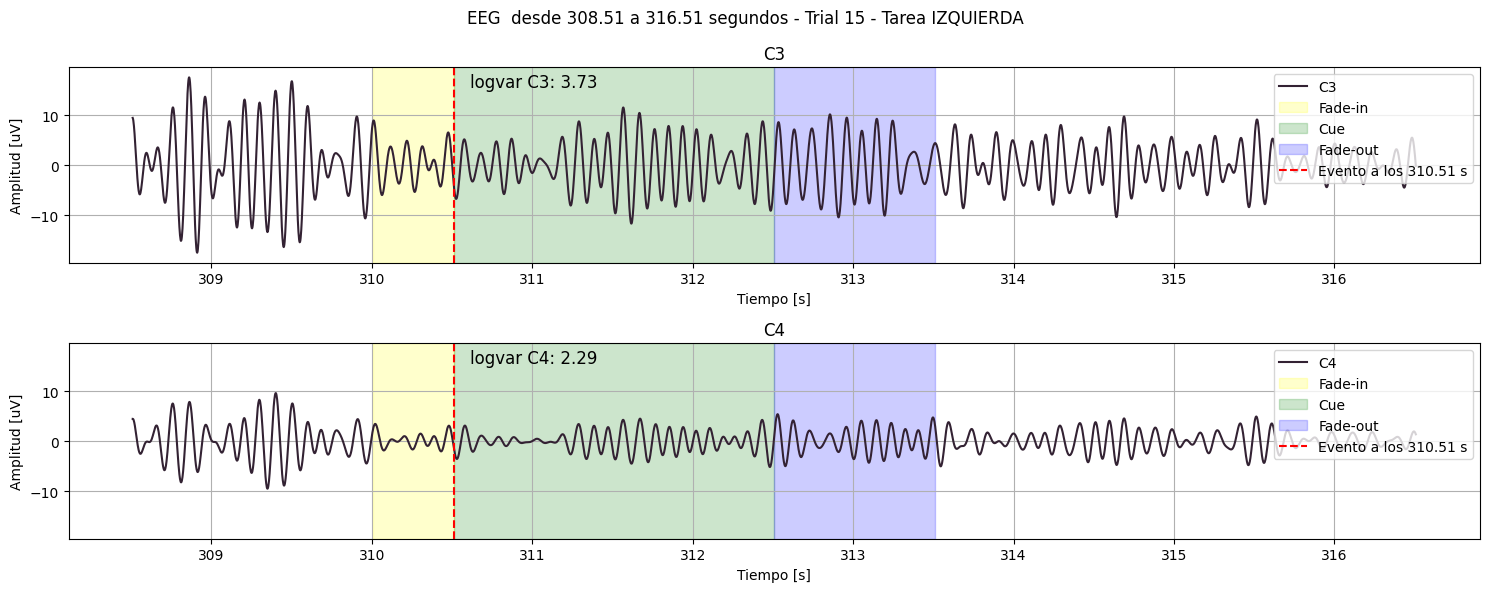

In [28]:
##ploteamos un canal desde ti hasta tf
trial = 15
trigger_i = round(triggers[trial][0]/fm,2)

t_fi = 0.5 #tiempo fade-in
t_cue = 2 #tiempo cue
t_fo = 1 #tiempo fade-out

ti = int((trigger_i-2)*fm) #tiempo inicial en segundos
tf = int((trigger_i+6)*fm)
c1, c2 = 32, 34

ejet = np.arange(0, muestras)/fm
fig, axs = plt.subplots(2, 1, figsize=(15, 6))

eeg1, eeg2 = filtered_eeg[c1-1, ti:tf], filtered_eeg[c2-1, ti:tf]
##me quedo con los valores máximos y mínimos entre eeg1 y eeg2
max_eeg = max(max(eeg1), max(eeg2))
min_eeg = min(min(eeg1), min(eeg2))
ejet1, ejet2 = ejet[ti:tf], ejet[ti:tf]

##calculo el logaritmo de la varianza de cada canal
eeg1_forlogvar, eeg2_forlogvar = eeg1[:int((t_fi+t_cue)*fm)], eeg2[:int((t_fi+t_cue)*fm)]
logvar_eeg1, logvar_eeg2 = np.log(np.var(eeg1_forlogvar)), np.log(np.var(eeg2_forlogvar))

axs[0].plot(ejet1,eeg1, label = f'C3', color = "#332233")
axs[1].plot(ejet2,eeg2, label = f'C4', color  ="#332233")

##sombras para marcado de tiempos
axs[0].axvspan(trigger_i-t_fi, trigger_i, alpha=0.2, color='yellow', label = "Fade-in")
axs[1].axvspan(trigger_i-t_fi, trigger_i, alpha=0.2, color='yellow', label = "Fade-in")
axs[0].axvspan(trigger_i, trigger_i+t_cue, alpha=0.2, color='green', label = "Cue")
axs[1].axvspan(trigger_i, trigger_i+t_cue, alpha=0.2, color='green', label = "Cue")
axs[0].axvspan(trigger_i+t_cue, trigger_i+t_cue+t_fo, alpha=0.2, color='blue', label = "Fade-out")
axs[1].axvspan(trigger_i+t_cue, trigger_i+t_cue+t_fo, alpha=0.2, color='blue', label = "Fade-out")

##agrego texto con el valor de logvar_eeg1 y logvar_eeg2.
axs[0].text(trigger_i+0.1, max_eeg-2, f"logvar C3: {round(logvar_eeg1,2)}", fontsize=12, color='black')
axs[1].text(trigger_i+0.1, max_eeg-2, f"logvar C4: {round(logvar_eeg2,2)}", fontsize=12, color='black')

axs[0].set_title(f"C3")
axs[1].set_title(f"C4")

axs[0].axvline(x=trigger_i, color='r', linestyle='--', label=f'Evento a los {trigger_i} s')
axs[1].axvline(x=trigger_i, color='r', linestyle='--', label=f'Evento a los {trigger_i} s')

axs[0].grid()
axs[1].grid()

axs[0].set_xlabel("Tiempo [s]")
axs[0].set_ylabel("Amplitud [uV]")
axs[0].legend(loc = "upper right")

axs[1].set_xlabel("Tiempo [s]")
axs[1].set_ylabel("Amplitud [uV]")
axs[1].legend(loc = "upper right")

##limite eje y para ambos canales
axs[0].set_ylim([min_eeg-2, max_eeg+2])
axs[1].set_ylim([min_eeg-2, max_eeg+2])

plt.suptitle((f"EEG  desde {round(ti/fm,2)} a {round(tf/fm,2)} segundos - Trial {trial} - Tarea {eventos.loc[trial-1]['className']}"))
plt.tight_layout()
plt.show()


La gráfica anterior muetra la señal de EEG para los canales C3 y C4. La línea verticual roja muestra el incio del trial.

In [29]:
# eeg_tosave = raw_eeg.reshape(canales, muestras)
# ##guardo eeg_tosave en un archivo .hdf5
# with h5py.File("raweeg_imagined_tasks.hdf5", "w") as f:
#     f.create_dataset("raw_eeg", data=eeg_tosave)

In [30]:
# classname = eventos["className"].values
# classname
# events_time = raw_base_data["AsynchronData"]["Time"][:][1:].reshape(-1)

# df = pd.DataFrame({"event_time": events_time, "class_name": classname})
# df.to_csv("events_imagined_tasks.txt", index=False, sep=",", header=True)

In [31]:
import pandas as pd

df = pd.read_csv("sn1_ts0_ct1_r2_events.txt")
df

,trialNumber,classNumber,className,startingTime,cueInitTime,trialDuration,cueDuration,finishDuration,fadeInDuration,startingTime(legible)
0,1,2,DERECHA,1.739914e+09,1.739914e+09,1.739914e+09,2.0,1.0,0.320427,18/02/2025 18:21:37
1,2,2,DERECHA,1.739914e+09,1.739914e+09,1.739914e+09,2.0,1.0,0.321408,18/02/2025 18:21:53
2,3,1,IZQUIERDA,1.739914e+09,1.739914e+09,1.739914e+09,2.0,1.0,0.320933,18/02/2025 18:22:10
3,4,1,IZQUIERDA,1.739914e+09,1.739914e+09,1.739914e+09,2.0,1.0,0.309372,18/02/2025 18:22:26
4,5,2,DERECHA,1.739914e+09,1.739914e+09,1.739914e+09,2.0,1.0,0.320359,18/02/2025 18:22:44
5,6,1,IZQUIERDA,1.739914e+09,1.739914e+09,1.739914e+09,2.0,1.0,0.310423,18/02/2025 18:23:01
6,7,2,DERECHA,1.739914e+09,1.739914e+09,1.739914e+09,2.0,1.0,0.316634,18/02/2025 18:23:17
7,8,1,IZQUIERDA,1.739914e+09,1.739914e+09,1.739914e+09,2.0,1.0,0.319219,18/02/2025 18:23:36
8,9,2,DERECHA,1.739914e+09,1.739914e+09,1.739914e+09,2.0,1.0,0.319037,18/02/2025 18:23:54
9,10,2,DERECHA,1.739914e+09,1.739914e+09,1.739914e+09,2.0,1.0,0.320723,18/02/2025 18:24:11


In [32]:
df["trialDuration"].diff().mean()

np.float64(17.387326391119707)

In [33]:
df["trialDuration"].diff().std()

np.float64(0.5575517366817669)

In [34]:
df["fadeInDuration"].mean(), df["fadeInDuration"].std()

(np.float64(0.31758626699447634), np.float64(0.005838682704935769))

In [ ]:
# eeg_tosave = raw_eeg.reshape(64, 211827)[[31,32,33],:]

# with open("eeg.npy","wb") as f:
#     np.save(f, eeg_tosave)